# Importing the required modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split as tts

In [3]:
df  = pd.read_csv('RAT01.csv')
df1 = pd.read_csv('RAT02.csv')
df2 = pd.read_csv('RAT03.csv')
df3 = pd.read_csv('RAT04.csv')
df4 = pd.read_csv('RAT05.csv')
df5 = pd.read_csv('RAT06.csv')
df6 = pd.read_csv('RAT07.csv')
df7 = pd.read_csv('RAT08.csv')
for i in (df.columns.values):
    print(type(i))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [4]:
df.head()
df.shape


(89733, 7)

In [5]:
import pandas as pd
dfs = []  # List to store the DataFrames

for i in range(1, 9):
   file_name = f'RAT0{i}.csv'  # Construct the file name
   df = pd.read_csv(file_name)  # Read the CSV file into a DataFrame
   df['Target'] = file_name[:-4]# Add an 'Target' column with values as filename without extection
   dfs.append(df)  # Append the DataFrame to the list
df_merge = pd.concat(dfs,ignore_index=True)
# Print the first few rows of the DataFrame where 'Malicious' is equal to 1
df_merge['Info'].head()

# dfs =[df,df1,df2,df3,df4,df5,df6,df7]
# df_merge = pd.concat(dfs,ignore_index=True)

0    Standard query 0x04da A infinitedata-pa.google...
1    45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2    853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...
3    Standard query response 0x04da A infinitedata-...
4    45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...
Name: Info, dtype: object

In [6]:
df_merge.shape

(563334, 8)

In [7]:
df_merge.head()

No.      Time     Source Destination Protocol  Length  \
0    1  0.000000  10.8.0.61     8.8.8.8      DNS      76   
1    2  0.016637  10.8.0.61     8.8.8.8      TCP      60   
2    3  0.017375    8.8.8.8   10.8.0.61      TCP      60   
3    4  0.017912    8.8.8.8   10.8.0.61      DNS      92   
4    5  0.020687  10.8.0.61     8.8.8.8      TCP      52   

                                                Info Target  
0  Standard query 0x04da A infinitedata-pa.google...  RAT01  
1  45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01  
2  853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01  
3  Standard query response 0x04da A infinitedata-...  RAT01  
4  45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01

In [8]:
# Define the mapping
malicious_mapping = {
    '147.32.83.234': 1,
    '147.32.83.253': 1,
    '35.201.97.85': 1,
    '147.32.83.181': 1,
    '192.168.131.1': 1,
    '147.32.83.230': 1,
    '147.32.83.157': 1
}

# Create a new column 'Malicious' based on the mapping
df_merge['Malicious0'] = df_merge['Source'].map(malicious_mapping)
df_merge['Malicious1'] = df_merge['Destination'].map(malicious_mapping)
df_merge['Malicious0'] = df_merge['Malicious0'].fillna(0)
df_merge['Malicious1'] = df_merge['Malicious1'].fillna(0)
df_merge['Malicious'] = df_merge['Malicious0'] + df_merge['Malicious1']
df_merge.drop(['Malicious0','Malicious1'],axis=1,inplace=True)



In [9]:
df_merge.head(48594)


No.         Time         Source    Destination Protocol  Length  \
0          1     0.000000      10.8.0.61        8.8.8.8      DNS      76   
1          2     0.016637      10.8.0.61        8.8.8.8      TCP      60   
2          3     0.017375        8.8.8.8      10.8.0.61      TCP      60   
3          4     0.017912        8.8.8.8      10.8.0.61      DNS      92   
4          5     0.020687      10.8.0.61        8.8.8.8      TCP      52   
...      ...          ...            ...            ...      ...     ...   
48589  48590  2873.365272  147.32.83.234      10.8.0.61      TCP      52   
48590  48591  2873.365352      10.8.0.61  147.32.83.234      TCP    1400   
48591  48592  2873.365785      10.8.0.61  147.32.83.234      TCP    1400   
48592  48593  2873.365844      10.8.0.61  147.32.83.234      TCP    1400   
48593  48594  2873.365956  147.32.83.234      10.8.0.61      TCP      52   

                                                    Info Target  Malicious  
0      Standard query 0x04da A infinitedata-pa.google...  RAT01        0.0  
1      45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01        0.0  
2      853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01        0.0  
3      Standard query response 0x04da A infinitedata-...  RAT01        0.0  
4      45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01        0.0  
...                                                  ...    ...        ...  
48589  1337  >  37649 [ACK] Seq=36 Ack=12177417 Win=1...  RAT01        1.0  
48590  37649  >  1337 [ACK] Seq=12181461 Ack=36 Win=8...  RAT01        1.0  
48591  37649  >  1337 [ACK] Seq=12182809 Ack=36 Win=8...  RAT01        1.0  
48592  37649  >  1337 [ACK] Seq=12184157 Ack=36 Win=8...  RAT01        1.0  
48593  1337  >  37649 [ACK] Seq=36 Ack=12180113 Win=1...  RAT01        1.0  

[48594 rows x 9 columns]

In [10]:
src = []
dst = []

for i in range(len(df_merge)):
    if df_merge['Malicious'][i] == 1:
        src.append(df_merge['Source'][i])
        dst.append(df_merge['Destination'][i])


In [11]:
for i in range(len(src)):
    print(f"{src[i]} -> {dst[i]}")

10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
147.32.83.234 -> 10.8.0.61
147.32.83.234 -> 10.8.0.61
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
147.32.83.234 -> 10.8.0.61
10.8.0.61 -> 147.32.83.234
10.8.0.61 -> 147.32.83.234
147.32.83.234 -> 10.8.0.61
1

In [12]:
df_merge.head()

No.      Time     Source Destination Protocol  Length  \
0    1  0.000000  10.8.0.61     8.8.8.8      DNS      76   
1    2  0.016637  10.8.0.61     8.8.8.8      TCP      60   
2    3  0.017375    8.8.8.8   10.8.0.61      TCP      60   
3    4  0.017912    8.8.8.8   10.8.0.61      DNS      92   
4    5  0.020687  10.8.0.61     8.8.8.8      TCP      52   

                                                Info Target  Malicious  
0  Standard query 0x04da A infinitedata-pa.google...  RAT01        0.0  
1  45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01        0.0  
2  853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01        0.0  
3  Standard query response 0x04da A infinitedata-...  RAT01        0.0  
4  45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01        0.0

In [13]:
import re
Sourceport_ips = []
Destination_ips = []
for i in range(len(df_merge['Info'])):
    text = str(df_merge['Info'][i])
    # Use a regular expression to extract the desired part
    match = re.search(r'(\d+\s{2}\>\s{2}\d+)', text)

    if match:
        result = match.group(1)
        result=result.split('  ')
        if '>' in result:
            result.remove('>')
        t = int(result[0])
        Sourceport_ips.append(t)
        t1 = int(result[1])
        Destination_ips.append(t1)
        #This is a Source ip and Source port number tuple
    else:
        Sourceport_ips.append(0)
        Destination_ips.append(0)

In [14]:
df_merge['Source_port'] = Sourceport_ips
df_merge['Destination_port'] = Destination_ips
df_merge['Above_1024'] = np.where((df_merge['Source_port'] > 1024) | (df_merge['Destination_port'] > 1024), 1, 0)
df_merge.head()

No.      Time     Source Destination Protocol  Length  \
0    1  0.000000  10.8.0.61     8.8.8.8      DNS      76   
1    2  0.016637  10.8.0.61     8.8.8.8      TCP      60   
2    3  0.017375    8.8.8.8   10.8.0.61      TCP      60   
3    4  0.017912    8.8.8.8   10.8.0.61      DNS      92   
4    5  0.020687  10.8.0.61     8.8.8.8      TCP      52   

                                                Info Target  Malicious  \
0  Standard query 0x04da A infinitedata-pa.google...  RAT01        0.0   
1  45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01        0.0   
2  853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01        0.0   
3  Standard query response 0x04da A infinitedata-...  RAT01        0.0   
4  45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01        0.0   

   Source_port  Destination_port  Above_1024  
0            0                 0           0  
1        45949               853           1  
2          853             45949           1  
3            0                 0           0  
4        45949               853           1

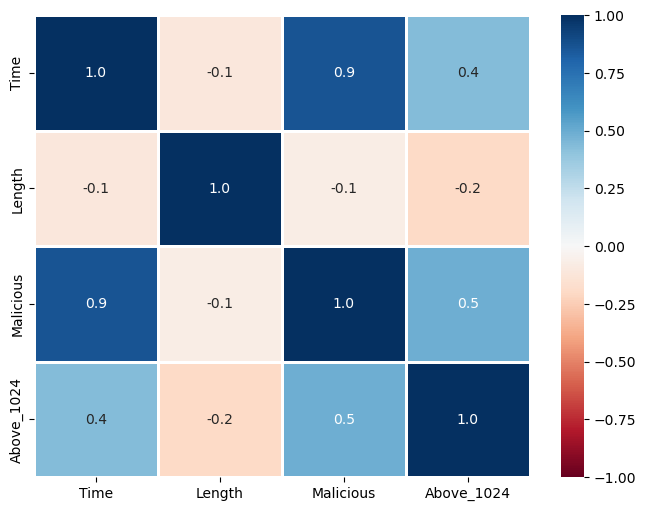

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest from your DataFrame
selected_columns = df_merge[['Time', 'Length','Malicious','Above_1024']]

# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']
# Calculate the correlation matrix for these selected columns
correlation_matrix = selected_columns.corr()

# Create a figure with the desired size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt='.1f', linewidths=2)

# Show the heatmap
plt.show()


In [16]:
df_merge.head()

No.      Time     Source Destination Protocol  Length  \
0    1  0.000000  10.8.0.61     8.8.8.8      DNS      76   
1    2  0.016637  10.8.0.61     8.8.8.8      TCP      60   
2    3  0.017375    8.8.8.8   10.8.0.61      TCP      60   
3    4  0.017912    8.8.8.8   10.8.0.61      DNS      92   
4    5  0.020687  10.8.0.61     8.8.8.8      TCP      52   

                                                Info Target  Malicious  \
0  Standard query 0x04da A infinitedata-pa.google...  RAT01        0.0   
1  45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01        0.0   
2  853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01        0.0   
3  Standard query response 0x04da A infinitedata-...  RAT01        0.0   
4  45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01        0.0   

   Source_port  Destination_port  Above_1024  
0            0                 0           0  
1        45949               853           1  
2          853             45949           1  
3            0                 0           0  
4        45949               853           1

In [17]:
Y = df_merge['Malicious']
X = df_merge.drop("Target",axis=1)
X.shape

(563334, 11)

In [18]:
df_merge.head()

No.      Time     Source Destination Protocol  Length  \
0    1  0.000000  10.8.0.61     8.8.8.8      DNS      76   
1    2  0.016637  10.8.0.61     8.8.8.8      TCP      60   
2    3  0.017375    8.8.8.8   10.8.0.61      TCP      60   
3    4  0.017912    8.8.8.8   10.8.0.61      DNS      92   
4    5  0.020687  10.8.0.61     8.8.8.8      TCP      52   

                                                Info Target  Malicious  \
0  Standard query 0x04da A infinitedata-pa.google...  RAT01        0.0   
1  45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01        0.0   
2  853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01        0.0   
3  Standard query response 0x04da A infinitedata-...  RAT01        0.0   
4  45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01        0.0   

   Source_port  Destination_port  Above_1024  
0            0                 0           0  
1        45949               853           1  
2          853             45949           1  
3            0                 0           0  
4        45949               853           1

In [19]:
X.Source.value_counts().sort_values(ascending=False).head(10)

Source
10.8.0.93                          112298
157.240.30.27                      103254
147.32.83.181                       50035
10.8.0.61                           44945
157.240.30.63                       34676
10.8.0.249                          33736
216.58.201.99                       24371
2a03:2880:f03d:1c:face:b00c:0:3     20690
10.8.0.57                           20332
10.8.0.117                          16643
Name: count, dtype: int64

In [20]:
top_10 = [x for x in X.Source.value_counts().sort_values(ascending=False).head(10).index]
top_10 

['10.8.0.93',
 '157.240.30.27',
 '147.32.83.181',
 '10.8.0.61',
 '157.240.30.63',
 '10.8.0.249',
 '216.58.201.99',
 '2a03:2880:f03d:1c:face:b00c:0:3',
 '10.8.0.57',
 '10.8.0.117']

In [21]:
for label in top_10:
    X[label]=np.where(X['Source']==label,1,0)
X[['Source']+top_10].head(5)

Source  10.8.0.93  157.240.30.27  147.32.83.181  10.8.0.61  \
0  10.8.0.61          0              0              0          1   
1  10.8.0.61          0              0              0          1   
2    8.8.8.8          0              0              0          0   
3    8.8.8.8          0              0              0          0   
4  10.8.0.61          0              0              0          1   

   157.240.30.63  10.8.0.249  216.58.201.99  2a03:2880:f03d:1c:face:b00c:0:3  \
0              0           0              0                                0   
1              0           0              0                                0   
2              0           0              0                                0   
3              0           0              0                                0   
4              0           0              0                                0   

   10.8.0.57  10.8.0.117  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0

In [22]:
top_10 = [x for x in X.Destination.value_counts().sort_values(ascending=False).head(10).index]
top_10                                                                                  

['147.32.83.181',
 '10.8.0.93',
 '10.8.0.249',
 '10.8.0.61',
 '10.8.0.57',
 '147.32.83.234',
 '2001:718:2:903:b877:48ae:9531:fbfc',
 '10.8.0.117',
 '157.240.30.27',
 '10.8.0.137']

In [23]:
for label in top_10:
    X[label]=np.where(X['Destination']==label,1,0)
X[['Destination']+top_10].head(5)

Destination  147.32.83.181  10.8.0.93  10.8.0.249  10.8.0.61  10.8.0.57  \
0     8.8.8.8              0          0           0          0          0   
1     8.8.8.8              0          0           0          0          0   
2   10.8.0.61              0          0           0          1          0   
3   10.8.0.61              0          0           0          1          0   
4     8.8.8.8              0          0           0          0          0   

   147.32.83.234  2001:718:2:903:b877:48ae:9531:fbfc  10.8.0.117  \
0              0                                   0           0   
1              0                                   0           0   
2              0                                   0           0   
3              0                                   0           0   
4              0                                   0           0   

   157.240.30.27  10.8.0.137  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0

In [24]:
top_10 = [x for x in X.Protocol.value_counts().sort_values(ascending=False).head(10).index]
top_10

['TCP',
 'QUIC',
 'TLSv1.3',
 'TLSv1.2',
 'GQUIC',
 'DNS',
 'ICMP',
 'IRC',
 'ICMPv6',
 'WebSocket']

In [25]:
for label in top_10:
    X[label]=np.where(X['Protocol']==label,1,0)
X[['Protocol']+top_10].head(5)

Protocol  TCP  QUIC  TLSv1.3  TLSv1.2  GQUIC  DNS  ICMP  IRC  ICMPv6  \
0      DNS    0     0        0        0      0    1     0    0       0   
1      TCP    1     0        0        0      0    0     0    0       0   
2      TCP    1     0        0        0      0    0     0    0       0   
3      DNS    0     0        0        0      0    1     0    0       0   
4      TCP    1     0        0        0      0    0     0    0       0   

   WebSocket  
0          0  
1          0  
2          0  
3          0  
4          0

In [26]:
X.drop(['Source','Destination','Protocol','Info'],axis=1,inplace=True)
X.shape

(563334, 30)

In [27]:
df_merge.head()

No.      Time     Source Destination Protocol  Length  \
0    1  0.000000  10.8.0.61     8.8.8.8      DNS      76   
1    2  0.016637  10.8.0.61     8.8.8.8      TCP      60   
2    3  0.017375    8.8.8.8   10.8.0.61      TCP      60   
3    4  0.017912    8.8.8.8   10.8.0.61      DNS      92   
4    5  0.020687  10.8.0.61     8.8.8.8      TCP      52   

                                                Info Target  Malicious  \
0  Standard query 0x04da A infinitedata-pa.google...  RAT01        0.0   
1  45949  >  853 [SYN] Seq=0 Win=65535 Len=0 MSS=...  RAT01        0.0   
2  853  >  45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...  RAT01        0.0   
3  Standard query response 0x04da A infinitedata-...  RAT01        0.0   
4  45949  >  853 [ACK] Seq=1 Ack=1 Win=88064 Len=...  RAT01        0.0   

   Source_port  Destination_port  Above_1024  
0            0                 0           0  
1        45949               853           1  
2          853             45949           1  
3            0                 0           0  
4        45949               853           1

In [28]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size=.3,random_state=1)
x_train.columns


Index(['No.', 'Time', 'Length', 'Malicious', 'Source_port', 'Destination_port',
       'Above_1024', '10.8.0.93', '157.240.30.27', '147.32.83.181',
       '10.8.0.61', '157.240.30.63', '10.8.0.249', '216.58.201.99',
       '2a03:2880:f03d:1c:face:b00c:0:3', '10.8.0.57', '10.8.0.117',
       '147.32.83.234', '2001:718:2:903:b877:48ae:9531:fbfc', '10.8.0.137',
       'TCP', 'QUIC', 'TLSv1.3', 'TLSv1.2', 'GQUIC', 'DNS', 'ICMP', 'IRC',
       'ICMPv6', 'WebSocket'],
      dtype='object')

In [29]:
x_train

No.         Time  Length  Malicious  Source_port  Destination_port  \
557397   42471   175.425611      83        0.0            0                 0   
193851   40814   254.574128    1401        0.0          443             42881   
277698   33209   242.417179      40        0.0        39140               443   
547701   32775    67.061160    1400        0.0          443             48892   
378200  133711  6478.267533    1400        1.0        41714              8000   
...        ...          ...     ...        ...          ...               ...   
371403  126914  6474.430126      52        1.0         8000             41714   
491263   17090   109.810933    1294        0.0            0                 0   
470924   31451  1964.326620     654        1.0        36280              1337   
491755   17582   110.435982     508        0.0            0                 0   
128037   38305   150.646630      52        0.0        46945               443   

        Above_1024  10.8.0.93  157.240.30.27  147.32.83.181  ...  TCP  QUIC  \
557397           0          0              0              0  ...    0     0   
193851           1          0              0              0  ...    1     0   
277698           1          0              0              0  ...    1     0   
547701           1          0              0              0  ...    1     0   
378200           1          0              0              1  ...    1     0   
...            ...        ...            ...            ...  ...  ...   ...   
371403           1          1              0              0  ...    1     0   
491263           0          0              0              0  ...    0     1   
470924           1          0              0              0  ...    1     0   
491755           0          0              0              0  ...    0     1   
128037           1          0              1              0  ...    1     0   

        TLSv1.3  TLSv1.2  GQUIC  DNS  ICMP  IRC  ICMPv6  WebSocket  
557397        0        1      0    0     0    0       0          0  
193851        0        0      0    0     0    0       0          0  
277698        0        0      0    0     0    0       0          0  
547701        0        0      0    0     0    0       0          0  
378200        0        0      0    0     0    0       0          0  
...         ...      ...    ...  ...   ...  ...     ...        ...  
371403        0        0      0    0     0    0       0          0  
491263        0        0      0    0     0    0       0          0  
470924        0        0      0    0     0    0       0          0  
491755        0        0      0    0     0    0       0          0  
128037        0        0      0    0     0    0       0          0  

[394333 rows x 30 columns]

In [30]:
# Applying SMOTE to our data and checking the class counts
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
print(x_train_balanced.shape)


(492666, 30)


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5 , max_depth=3)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [71]:
clf.score(x_train,y_train)

0.9869551876206151

In [62]:
from sklearn.metrics import classification_report
y_pred_dt = clf.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    105294
         1.0       1.00      1.00      1.00     63707

    accuracy                           1.00    169001
   macro avg       1.00      1.00      1.00    169001
weighted avg       1.00      1.00      1.00    169001



# Prediction

In [63]:
import random

# Generate a list of 26 random numbers between -1 and 1
random_numbers = [random.uniform(-1, 1) for _ in range(30)]

# Print the list
print(random_numbers)

print(clf.predict([random_numbers])[0])

[0.42199651062911014, -0.2962657548846206, 0.9840804649780006, -0.12800486091460472, 0.36342862567134926, 0.08673984551484981, -0.6549306173462692, 0.45145880346401923, -0.2488904047902667, 0.8407755369334393, -0.8894149775748226, -0.42000584573092103, 0.6301247020656304, 0.6428366182902554, 0.8131363411207109, 0.7188008476136978, -0.8393846634278552, 0.3460450881870507, 0.24975687805233382, -0.32345978350584126, -0.8314681842012648, 0.586117131768749, 0.8409542921811832, -0.9785000994477353, 0.554199804683186, -0.4892986130699739, -0.9960294838660875, 0.7695756065828399, -0.5937408673737441, 0.4920319586223747]
0.0


In [64]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_pred_dt) 

# Model accuracy 

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20 , max_depth=15)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [54]:
acc=clf.score(x_test,y_test)
print(acc)

1.0


In [55]:
acc = round(acc*100,2)
print(f'Accuracy of Random Forest classifier on training set: {acc} %')

Accuracy of Random Forest classifier on training set: 100.0 %


# Decision Tree

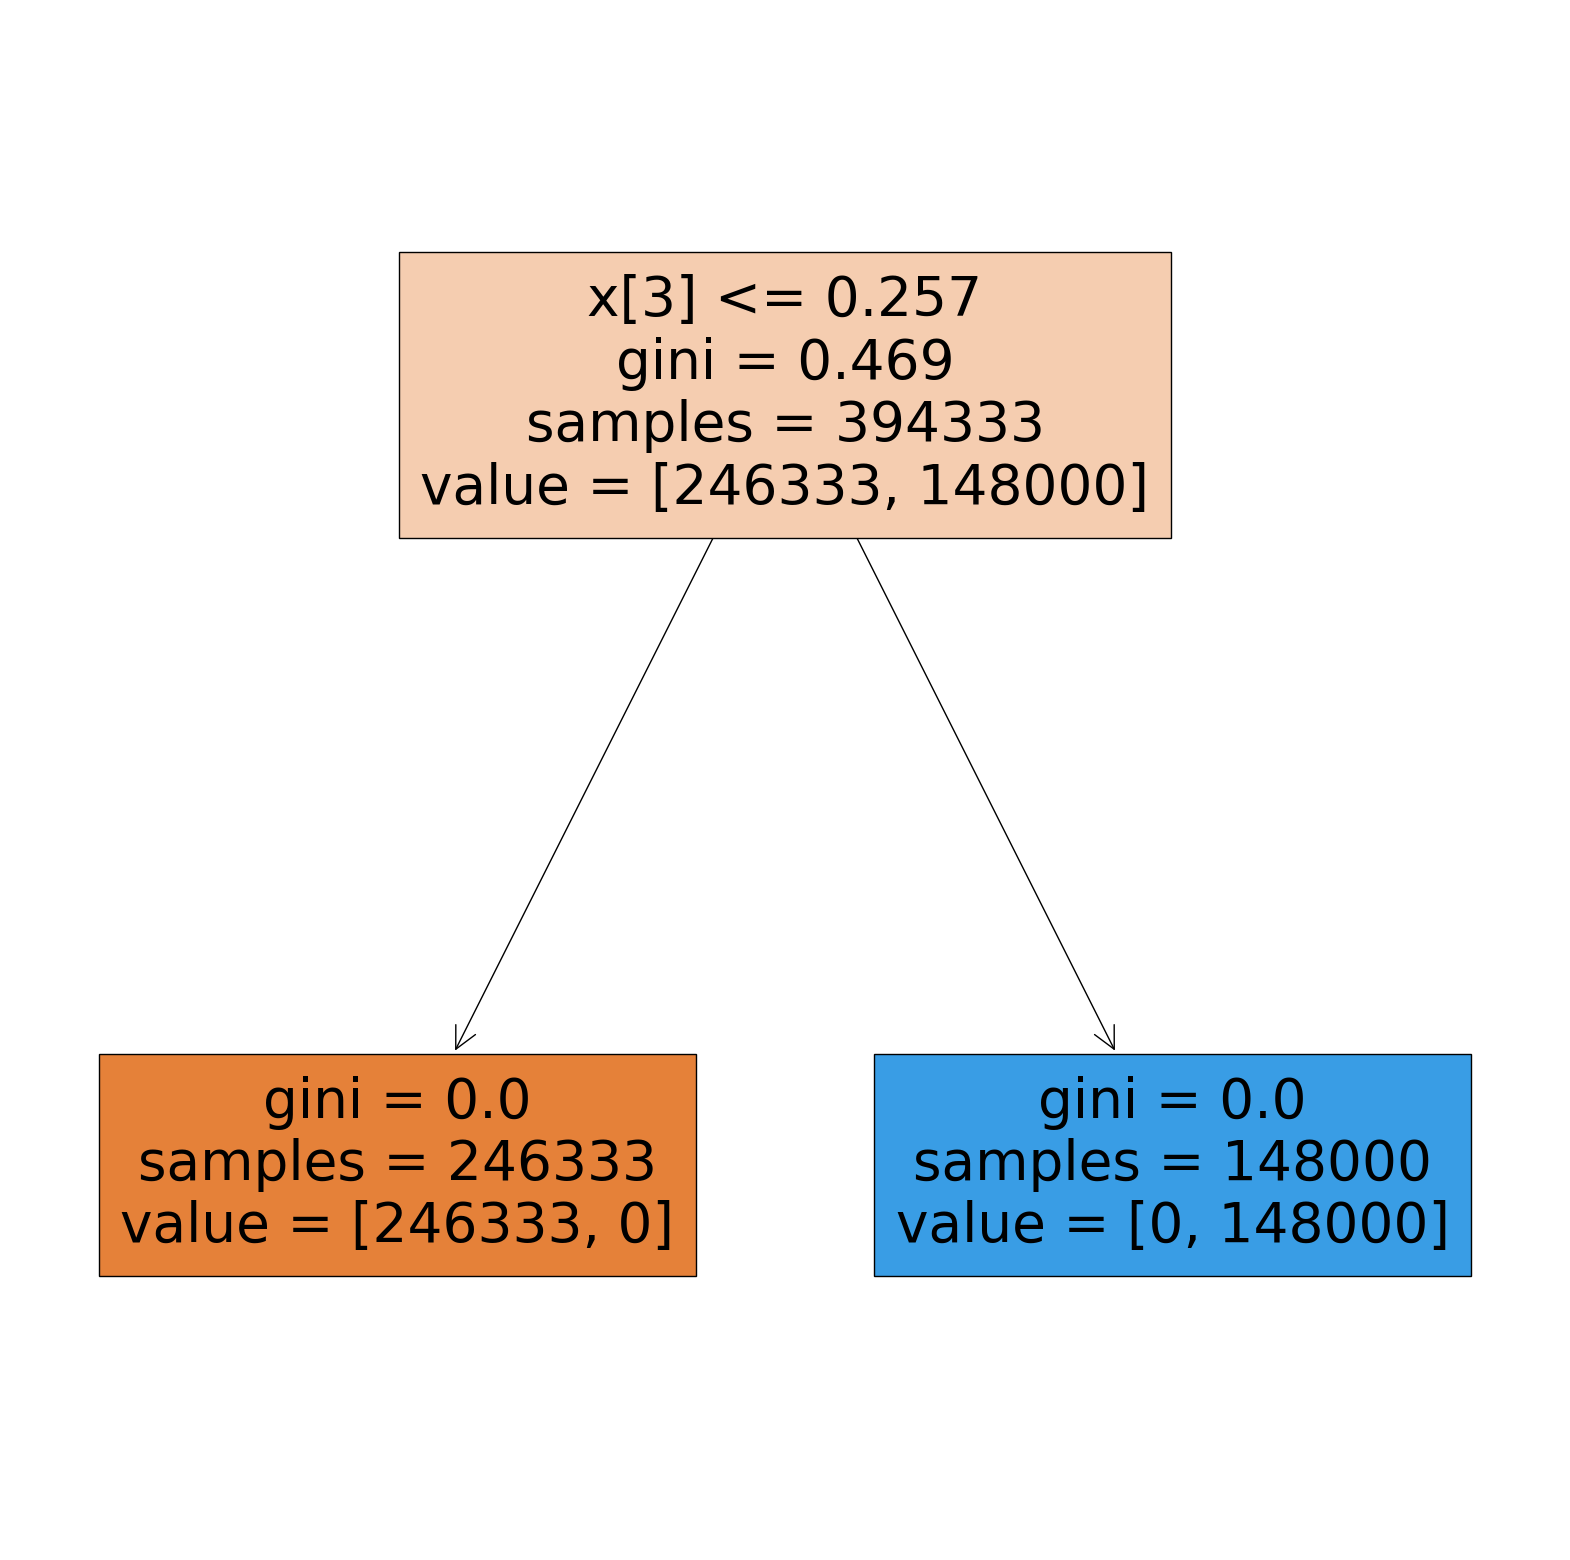

In [56]:
from sklearn import tree
dec = tree.DecisionTreeClassifier(max_depth=8)
dec = dec.fit(x_train,y_train)
acc = dec.score(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dec,filled=True)
plt.show()

In [57]:
print(f'Accuracy of Decision Tree classifier on training set: {round(acc*100,2)} %')

Accuracy of Decision Tree classifier on training set: 100.0 %


# Saving model for future use

In [58]:
import joblib

model_filename = 'Random_forest_model.pkl'
joblib.dump(clf, model_filename)


['Random_forest_model.pkl']